# Exercise 4: Neural Networks

For this exercise, you will create a simple neural network example in an AWS SageMaker notebook. We'll use a synthetic dataset to predict whether a customer will make a purchase based on two features:

1. Website visit duration
2. Number of pages visited.

This is a <b>binary classification problem</b>, and we'll use a small neural network for quick execution.

In [1]:
import numpy as np
import pandas as pd
import warnings
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

warnings.filterwarnings('ignore')

2024-03-27 17:23:24.454254: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-27 17:23:24.454399: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-27 17:23:28.586762: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-27 17:23:35.896968: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-27 17:23:53.633912: W tensorflow/comp

In [2]:
# Generating synthetic data
np.random.seed(0)
data_size = 200
features = np.random.rand(data_size, 2)  # Two features: visit duration and pages visited
labels = (features[:, 0] + features[:, 1] > 1).astype(int)  # Purchase (1) or not (0)

# Convert to DataFrame for easier manipulation
df = pd.DataFrame(features, columns=['VisitDuration', 'PagesVisited'])
df['Purchase'] = labels
df.head()

,VisitDuration,PagesVisited,Purchase
0,0.548814,0.715189,1
1,0.602763,0.544883,1
2,0.423655,0.645894,1
3,0.437587,0.891773,1
4,0.963663,0.383442,1


In [3]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(df[['VisitDuration', 'PagesVisited']], 
                                                    df['Purchase'], test_size=0.2, random_state=42)

# Define the model
model = Sequential([
    Dense(10, activation='relu', input_shape=(2,)),  # Input layer with 2 features
    Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=10)

2024-03-27 17:24:11.944599: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:274] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Epoch 1/10
16/16 [==============================] - 3s 2ms/step - loss: 0.7485 - accuracy: 0.5437
Epoch 2/10
16/16 [==============================] - 0s 2ms/step - loss: 0.7432 - accuracy: 0.5437
Epoch 3/10
16/16 [==============================] - 0s 2ms/step - loss: 0.7384 - accuracy: 0.5437
Epoch 4/10
16/16 [==============================] - 0s 2ms/step - loss: 0.7337 - accuracy: 0.5437
Epoch 5/10
16/16 [==============================] - 0s 2ms/step - loss: 0.7296 - accuracy: 0.5437
Epoch 6/10
16/16 [==============================] - 0s 2ms/step - loss: 0.7254 - accuracy: 0.5437
Epoch 7/10
16/16 [==============================] - 0s 3ms/step - loss: 0.7217 - accuracy: 0.5437
Epoch 8/10
16/16 [==============================] - 0s 2ms/step - loss: 0.7178 - accuracy: 0.5437
Epoch 9/10
16/16 [==============================] - 0s 2ms/step - loss: 0.7142 - accuracy: 0.5437
Epoch 10/10
16/16 [==============================] - 0s 3ms/step - loss: 0.7102 - accuracy: 0.5437


In [4]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy}")

2/2 [==============================] - 0s 6ms/step - loss: 0.7332 - accuracy: 0.3750
Test Accuracy: 0.375


Epoch 1/10
13/13 [==============================] - 1s 15ms/step - loss: 0.7051 - accuracy: 0.5469 - val_loss: 0.7118 - val_accuracy: 0.5312
Epoch 2/10
13/13 [==============================] - 0s 8ms/step - loss: 0.7023 - accuracy: 0.5469 - val_loss: 0.7082 - val_accuracy: 0.5312
Epoch 3/10
13/13 [==============================] - 0s 8ms/step - loss: 0.6993 - accuracy: 0.5469 - val_loss: 0.7047 - val_accuracy: 0.5312
Epoch 4/10
13/13 [==============================] - 0s 6ms/step - loss: 0.6957 - accuracy: 0.5469 - val_loss: 0.7013 - val_accuracy: 0.5312
Epoch 5/10
13/13 [==============================] - 0s 7ms/step - loss: 0.6926 - accuracy: 0.5469 - val_loss: 0.6975 - val_accuracy: 0.5312
Epoch 6/10
13/13 [==============================] - 0s 7ms/step - loss: 0.6891 - accuracy: 0.5469 - val_loss: 0.6936 - val_accuracy: 0.5312
Epoch 7/10
13/13 [==============================] - 0s 6ms/step - loss: 0.6859 - accuracy: 0.5469 - val_loss: 0.6898 - val_accuracy: 0.5312
Epoch 8/10
13/13 [=

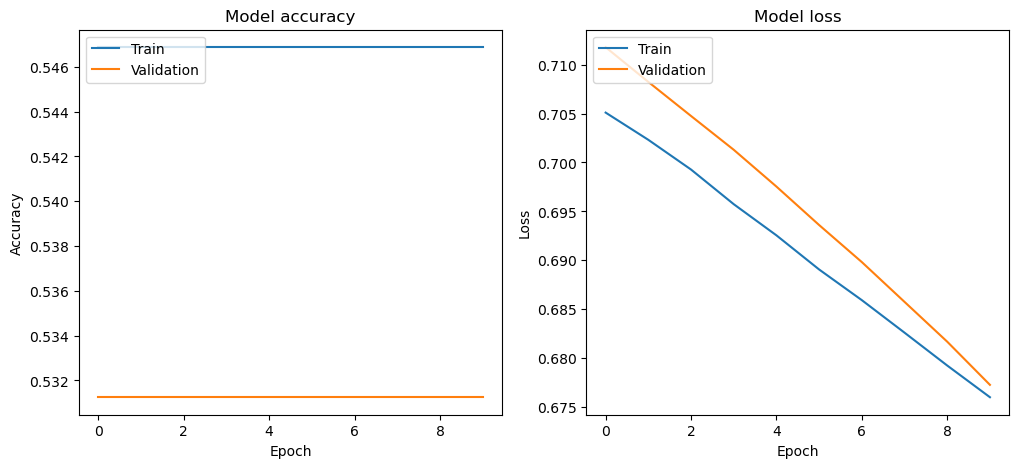

In [5]:
#Supress Warnings
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

# Train the model and save the history
history = model.fit(X_train, y_train, epochs=10, batch_size=10, validation_split=0.2)

# Plotting training and validation loss and accuracy

plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

313/313 [==============================] - 1s 2ms/step


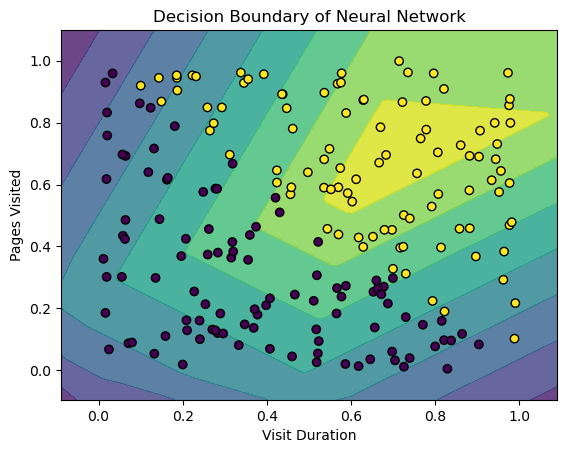

In [6]:
# Generate a grid over the feature space
x_min, x_max = df['VisitDuration'].min() - 0.1, df['VisitDuration'].max() + 0.1
y_min, y_max = df['PagesVisited'].min() - 0.1, df['PagesVisited'].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Predict over the grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the contour and training examples
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(df['VisitDuration'], df['PagesVisited'], c=df['Purchase'], edgecolor='k')
plt.xlabel('Visit Duration')
plt.ylabel('Pages Visited')
plt.title('Decision Boundary of Neural Network')
plt.show()